In [114]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height','width','mass','color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits[['fruit_label']] -1

cancer = load_breast_cancer()
(X_cancer , y_cancer ) = load_breast_cancer(return_X_y  =True)

# Dimensionality Reduction

## PCA

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape,X_pca.shape)

(569, 30) (569, 2)


<IPython.core.display.Javascript object>


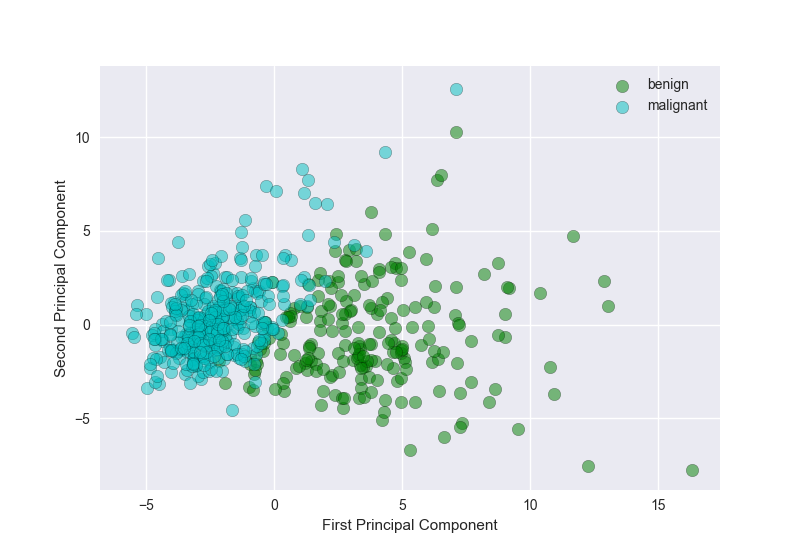

In [74]:
# PLoting PCA 
plt.figure()
plt.scatter(X_pca[:,0][y_cancer==0],X_pca[:,1][y_cancer==0],c='g',alpha=0.5,label='benign',edgecolors='black',s=80)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_pca[:,0][y_cancer==1],X_pca[:,1][y_cancer==1],c='c',alpha=0.5,label='malignant',edgecolors='black',s=80)
plt.legend()

<IPython.core.display.Javascript object>


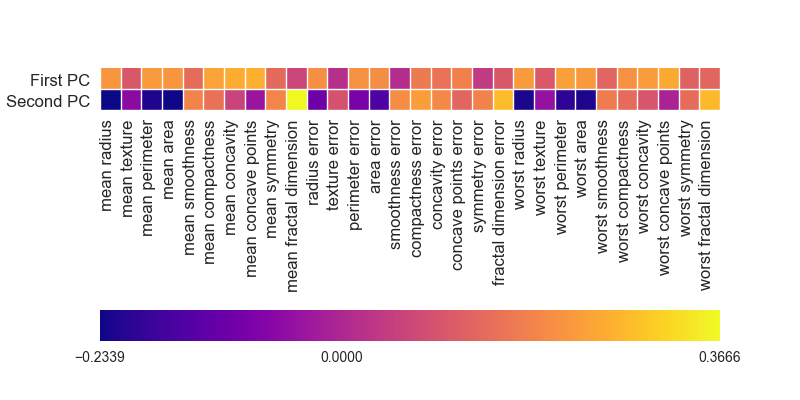

In [95]:
# PLotting magnitude of each feature  for first two principal components
fig = plt.figure(figsize=(8,4))
plt.imshow(pca.components_,cmap='plasma')
feature_names = list(cancer.feature_names)
plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,pca.components_.max()], pad=0.65);
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);


<IPython.core.display.Javascript object>


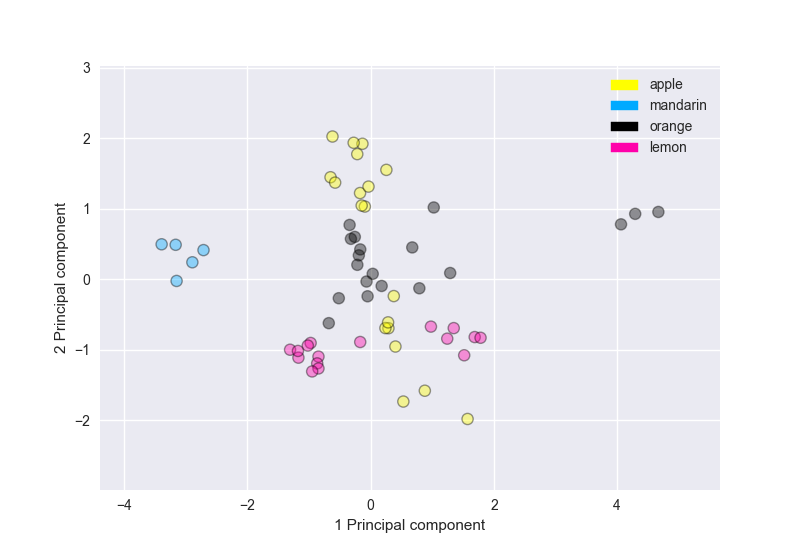

In [120]:
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)
pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca,y_fruits, ['apple','mandarin','orange','lemon'])
plt.xlabel('1 Principal component')
plt.ylabel('2 Principal component')

## Manifold Learning Methods

<IPython.core.display.Javascript object>


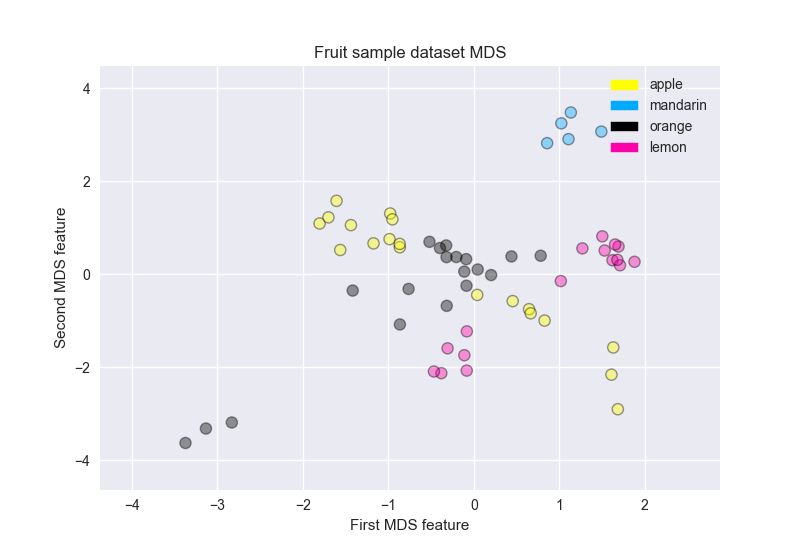

In [115]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

<IPython.core.display.Javascript object>


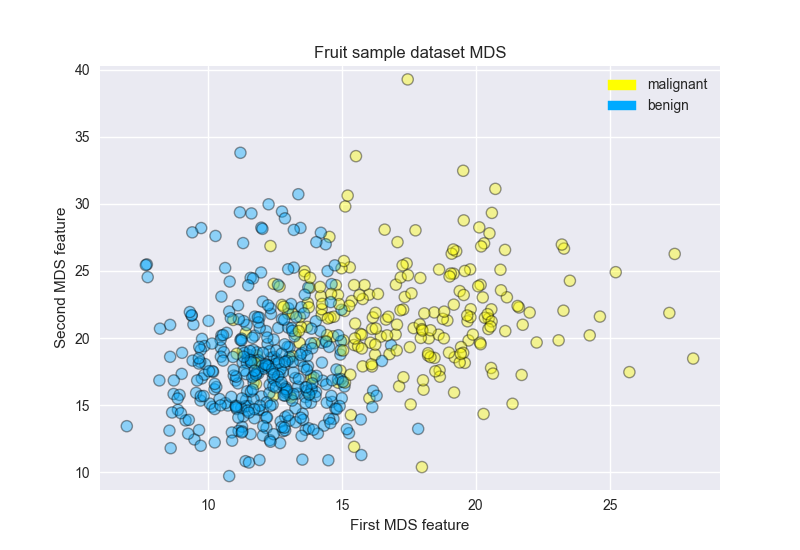

In [116]:
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_cancer_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_cancer_normalized)

plot_labelled_scatter(X_cancer, y_cancer, ['malignant','benign'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

# T-Sne

## Brease cancer data

<IPython.core.display.Javascript object>


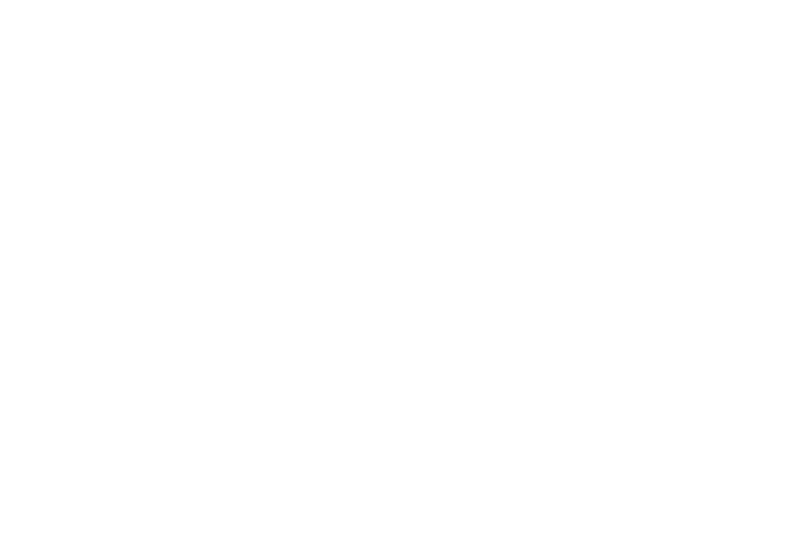

<IPython.core.display.Javascript object>


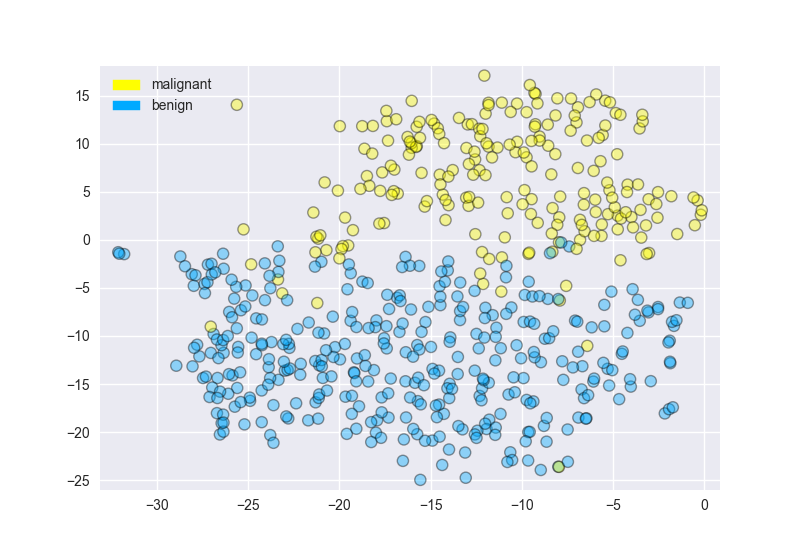

In [127]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state =0)
X_tsne = tsne.fit_transform(X_cancer_normalized)
plot_labelled_scatter(X_tsne,y_cancer,['malignant','benign'])
plt.xlabel('1 t-SNE feature')
plt.xlabel('1 t-SNE feature')